In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt

In [2]:
# connecting kaggle api to notebook
from kaggle.api.kaggle_api_extended import KaggleApi
api = KaggleApi()
api.authenticate()

In [3]:
#Downloading dataset from Kaggle 
api.dataset_download_files('brijbhushannanda1979/bigmart-sales-data') 
#Path inside the brackets is — username (of_person_who_published_dataset)/name (of_the_Kaggle_dataset).

In [4]:
# downloading as zipfile and extracting the data
from zipfile import ZipFile
zf = ZipFile('bigmart-sales-data.zip')
#extracted data is saved in the same directory as notebook
zf.extractall() 
zf.close()

In [5]:
df=pd.read_csv('Train.csv')
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
Item_Identifier              8523 non-null object
Item_Weight                  7060 non-null float64
Item_Fat_Content             8523 non-null object
Item_Visibility              8523 non-null float64
Item_Type                    8523 non-null object
Item_MRP                     8523 non-null float64
Outlet_Identifier            8523 non-null object
Outlet_Establishment_Year    8523 non-null int64
Outlet_Size                  6113 non-null object
Outlet_Location_Type         8523 non-null object
Outlet_Type                  8523 non-null object
Item_Outlet_Sales            8523 non-null float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.1+ KB


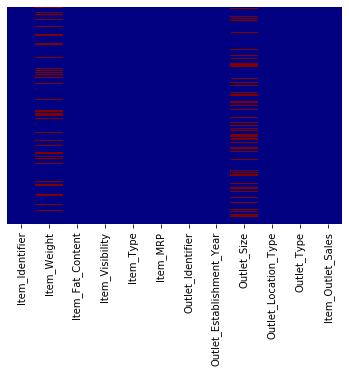

In [7]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='jet');

In [8]:
df.Item_Identifier.unique()

array(['FDA15', 'DRC01', 'FDN15', ..., 'NCF55', 'NCW30', 'NCW05'],
      dtype=object)

In [9]:
df.Item_Fat_Content.unique()

array(['Low Fat', 'Regular', 'low fat', 'LF', 'reg'], dtype=object)

In [10]:
df.Item_Fat_Content.replace({'low fat':'Low Fat','reg':'Regular','LF':'Low Fat'},inplace=True)

In [11]:
df.Item_Fat_Content.value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

In [12]:
df.Item_Fat_Content.value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

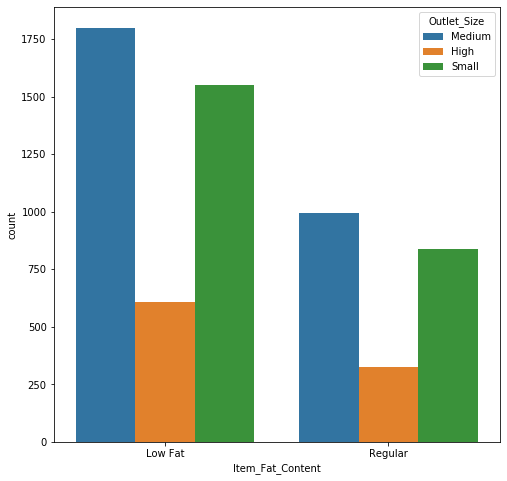

In [13]:
plt.figure(figsize=(8,8))
sns.countplot(df.Item_Fat_Content,hue=df.Outlet_Size);
plt.show()

In [14]:
# low fat food is preferred than regular on all the three outlet_sizes

In [15]:
df.Item_Type.unique()

array(['Dairy', 'Soft Drinks', 'Meat', 'Fruits and Vegetables',
       'Household', 'Baking Goods', 'Snack Foods', 'Frozen Foods',
       'Breakfast', 'Health and Hygiene', 'Hard Drinks', 'Canned',
       'Breads', 'Starchy Foods', 'Others', 'Seafood'], dtype=object)

In [16]:
df.Item_Type.value_counts()

Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

In [17]:
df.Outlet_Identifier.unique()

array(['OUT049', 'OUT018', 'OUT010', 'OUT013', 'OUT027', 'OUT045',
       'OUT017', 'OUT046', 'OUT035', 'OUT019'], dtype=object)

In [18]:
df.Outlet_Identifier.value_counts()

OUT027    935
OUT013    932
OUT049    930
OUT046    930
OUT035    930
OUT045    929
OUT018    928
OUT017    926
OUT010    555
OUT019    528
Name: Outlet_Identifier, dtype: int64

In [19]:
df.Outlet_Establishment_Year.unique()

array([1999, 2009, 1998, 1987, 1985, 2002, 2007, 1997, 2004], dtype=int64)

In [20]:
df.Outlet_Establishment_Year.value_counts()

1985    1463
1987     932
1999     930
1997     930
2004     930
2002     929
2009     928
2007     926
1998     555
Name: Outlet_Establishment_Year, dtype: int64

In [21]:
df.Outlet_Size.unique()

array(['Medium', nan, 'High', 'Small'], dtype=object)

In [22]:
df.Outlet_Size.value_counts()

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

In [23]:
df.Outlet_Location_Type.unique()

array(['Tier 1', 'Tier 3', 'Tier 2'], dtype=object)

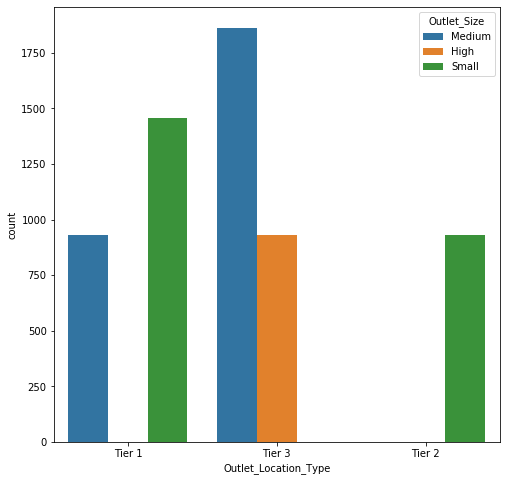

In [24]:
plt.figure(figsize=(8,8))
sns.countplot(df.Outlet_Location_Type,hue=df.Outlet_Size);
plt.show()

In [25]:
df.Outlet_Location_Type.value_counts()

Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: Outlet_Location_Type, dtype: int64

In [26]:
df.Outlet_Type.unique()

array(['Supermarket Type1', 'Supermarket Type2', 'Grocery Store',
       'Supermarket Type3'], dtype=object)

In [27]:
df.Outlet_Type.value_counts()

Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: Outlet_Type, dtype: int64

In [28]:
df.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [29]:
df[df.isna().any(axis=1)]

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
7,FDP10,NaN,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636
8,FDH17,16.200,Regular,0.016687,Frozen Foods,96.9726,OUT045,2002,NaN,Tier 2,Supermarket Type1,1076.5986
9,FDU28,19.200,Regular,0.094450,Frozen Foods,187.8214,OUT017,2007,NaN,Tier 2,Supermarket Type1,4710.5350
18,DRI11,NaN,Low Fat,0.034238,Hard Drinks,113.2834,OUT027,1985,Medium,Tier 3,Supermarket Type3,2303.6680
21,FDW12,NaN,Regular,0.035400,Baking Goods,144.5444,OUT027,1985,Medium,Tier 3,Supermarket Type3,4064.0432
23,FDC37,NaN,Low Fat,0.057557,Baking Goods,107.6938,OUT019,1985,Small,Tier 1,Grocery Store,214.3876
25,NCD06,13.000,Low Fat,0.099887,Household,45.9060,OUT017,2007,NaN,Tier 2,Supermarket Type1,838.9080
28,FDE51,5.925,Regular,0.161467,Dairy,45.5086,OUT010,1998,NaN,Tier 3,Grocery Store,178.4344
29,FDC14,NaN,Regular,0.072222,Canned,43.6454,OUT019,1985,Small,Tier 1,Grocery Store,125.8362


In [30]:
df.corr()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
Item_Weight,1.000000,-0.014048,0.027141,-0.011588,0.014123
Item_Visibility,-0.014048,1.000000,-0.001315,-0.074834,-0.128625
Item_MRP,0.027141,-0.001315,1.000000,0.005020,0.567574
Outlet_Establishment_Year,-0.011588,-0.074834,0.005020,1.000000,-0.049135
Item_Outlet_Sales,0.014123,-0.128625,0.567574,-0.049135,1.000000


In [31]:
from sklearn.impute import SimpleImputer
imp = SimpleImputer(strategy='most_frequent')
df['Outlet_Size']=imp.fit_transform(df['Outlet_Size'].values.reshape(-1,1))[:,0]

In [32]:
#df['Outlet_Size']=df['Outlet_Size'].fillna(value=df.Outlet_Size.mode(),inplace=True)

In [33]:
df['Outlet_Size']

0       Medium
1       Medium
2       Medium
3       Medium
4         High
5       Medium
6         High
7       Medium
8       Medium
9       Medium
10      Medium
11       Small
12      Medium
13       Small
14        High
15       Small
16      Medium
17      Medium
18      Medium
19       Small
20        High
21      Medium
22       Small
23       Small
24       Small
25      Medium
26       Small
27        High
28      Medium
29       Small
         ...  
8493    Medium
8494    Medium
8495     Small
8496    Medium
8497     Small
8498    Medium
8499     Small
8500    Medium
8501    Medium
8502    Medium
8503     Small
8504    Medium
8505    Medium
8506    Medium
8507     Small
8508    Medium
8509    Medium
8510     Small
8511    Medium
8512      High
8513     Small
8514    Medium
8515    Medium
8516    Medium
8517     Small
8518      High
8519    Medium
8520     Small
8521    Medium
8522     Small
Name: Outlet_Size, Length: 8523, dtype: object

In [34]:
imp1 = SimpleImputer(strategy='mean')
df.Item_Weight=imp1.fit_transform(df['Item_Weight'].values.reshape(-1,1))[:,0]

In [35]:
df.Item_Weight

0        9.300000
1        5.920000
2       17.500000
3       19.200000
4        8.930000
5       10.395000
6       13.650000
7       12.857645
8       16.200000
9       19.200000
10      11.800000
11      18.500000
12      15.100000
13      17.600000
14      16.350000
15       9.000000
16      11.800000
17       9.000000
18      12.857645
19      13.350000
20      18.850000
21      12.857645
22      14.600000
23      12.857645
24      13.850000
25      13.000000
26       7.645000
27      11.650000
28       5.925000
29      12.857645
          ...    
8493     7.420000
8494    15.200000
8495     9.695000
8496     7.420000
8497    13.650000
8498    15.350000
8499    11.600000
8500    20.350000
8501     5.340000
8502     8.420000
8503    20.500000
8504    12.857645
8505    10.500000
8506    17.250000
8507     5.880000
8508    11.350000
8509     8.100000
8510    13.800000
8511    17.500000
8512    20.700000
8513    12.000000
8514    15.000000
8515    20.700000
8516    18.600000
8517    20

In [36]:
df.isna().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

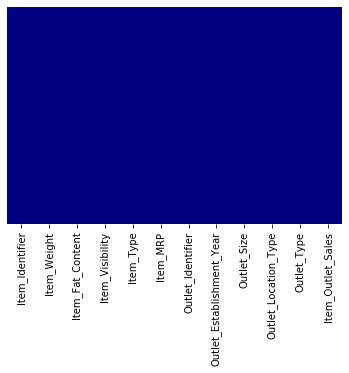

In [37]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='jet');

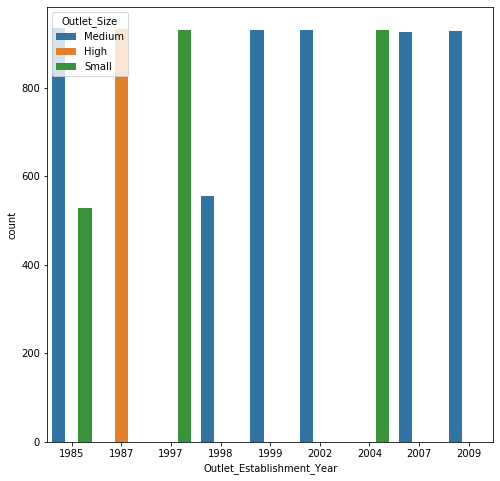

In [38]:
plt.figure(figsize=(8,8))
sns.countplot(df.Outlet_Establishment_Year,hue=df.Outlet_Size);
plt.show()

In [39]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


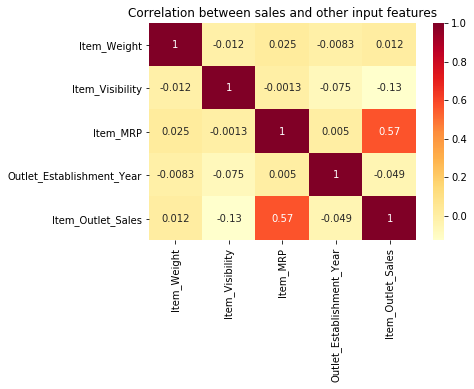

In [40]:
sns.heatmap(df.corr(),annot=True,cmap='YlOrRd');
plt.title('Correlation between sales and other input features');
plt.show()

In [41]:
df=df.drop(['Item_Identifier'],axis=1)

In [42]:
out_est_yr=df.groupby(['Outlet_Establishment_Year'])
out_est_yr.first()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
Outlet_Establishment_Year,,,,,,,,,,
1985,12.857645,Low Fat,0.127470,Snack Foods,107.7622,OUT027,Medium,Tier 3,Supermarket Type3,4022.7636
1987,8.930000,Low Fat,0.000000,Household,53.8614,OUT013,High,Tier 3,Supermarket Type1,994.7052
1997,18.500000,Regular,0.045464,Dairy,144.1102,OUT046,Small,Tier 1,Supermarket Type1,2187.1530
1998,19.200000,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,Medium,Tier 3,Grocery Store,732.3800
1999,9.300000,Low Fat,0.016047,Dairy,249.8092,OUT049,Medium,Tier 1,Supermarket Type1,3735.1380
2002,16.200000,Regular,0.016687,Frozen Foods,96.9726,OUT045,Medium,Tier 2,Supermarket Type1,1076.5986
2004,13.350000,Low Fat,0.102492,Dairy,230.5352,OUT035,Small,Tier 2,Supermarket Type1,2748.4224
2007,19.200000,Regular,0.094450,Frozen Foods,187.8214,OUT017,Medium,Tier 2,Supermarket Type1,4710.5350
2009,5.920000,Regular,0.019278,Soft Drinks,48.2692,OUT018,Medium,Tier 3,Supermarket Type2,443.4228


In [43]:
df.groupby(['Outlet_Establishment_Year'])['Item_Outlet_Sales'].mean()

Outlet_Establishment_Year
1985    2483.677474
1987    2298.995256
1997    2277.844267
1998     339.351662
1999    2348.354635
2002    2192.384798
2004    2438.841866
2007    2340.675263
2009    1995.498739
Name: Item_Outlet_Sales, dtype: float64

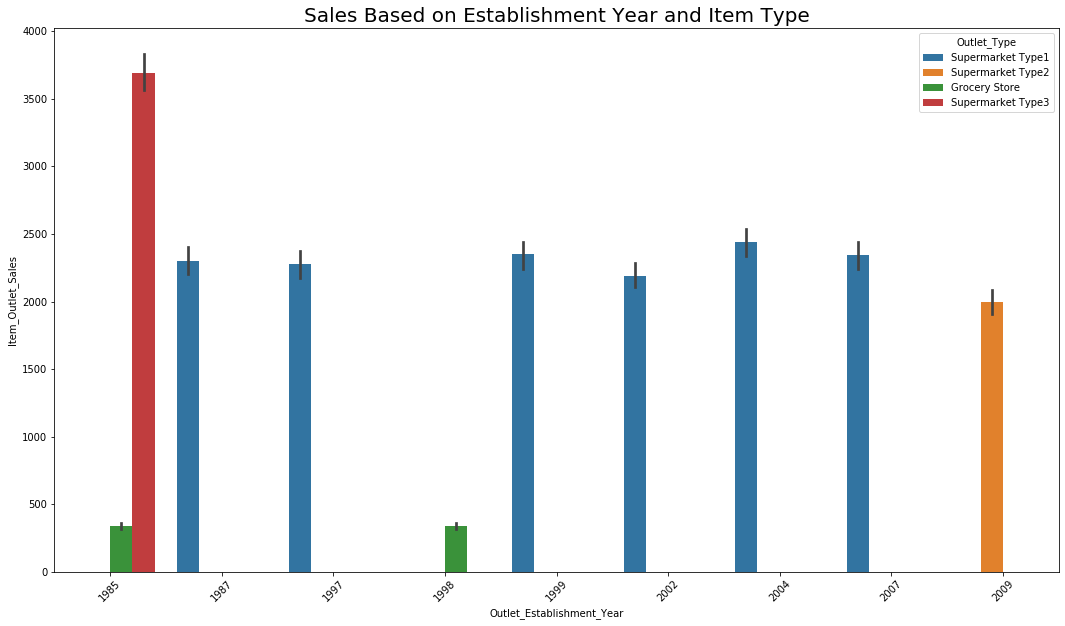

In [44]:
plt.figure(figsize=(18,10))
sns.barplot(x=df['Outlet_Establishment_Year'],y=df['Item_Outlet_Sales'],hue=df['Outlet_Type'])
plt.title('Sales Based on Establishment Year and Item Type',fontdict = {'fontsize' : 20},loc ='center', )
plt.xticks(rotation=45)
#ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
plt.show()

In [45]:
df=pd.get_dummies(df,drop_first=True)

In [46]:
df.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales,Item_Fat_Content_Regular,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,Item_Type_Dairy,...,Outlet_Identifier_OUT045,Outlet_Identifier_OUT046,Outlet_Identifier_OUT049,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,9.30,0.016047,249.8092,1999,3735.1380,0,0,0,0,1,...,0,0,1,1,0,0,0,1,0,0
1,5.92,0.019278,48.2692,2009,443.4228,1,0,0,0,0,...,0,0,0,1,0,0,1,0,1,0
2,17.50,0.016760,141.6180,1999,2097.2700,0,0,0,0,0,...,0,0,1,1,0,0,0,1,0,0
3,19.20,0.000000,182.0950,1998,732.3800,1,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0
4,8.93,0.000000,53.8614,1987,994.7052,0,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0


## Model Building

In [47]:
#splitting the dataset
y=df['Item_Outlet_Sales']
X=df.drop(['Item_Outlet_Sales'],axis=1)

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.2,random_state=42)

X_test.shape


(1705, 36)

In [48]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import  ExtraTreesRegressor
import xgboost as xg
from sklearn.metrics import r2_score,mean_squared_error
scores=[]

## LinearRegression

In [49]:
lreg=LinearRegression()

In [50]:
lreg.fit(X_train,y_train)

LinearRegression()

In [51]:
y_pred_lreg=lreg.predict(X_test)

In [52]:
scores.append(('Linear Regression',r2_score(y_test,y_pred_lreg)))

In [53]:
scores

[('Linear Regression', 0.5792664114419412)]

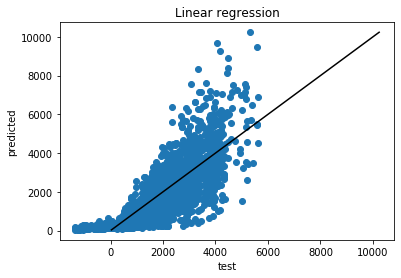

In [54]:
plt.scatter(y_pred_lreg,y_test)
plt.title('Linear regression')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='black')
plt.xlabel('test')
plt.ylabel('predicted')
plt.show()

In [55]:
rfr=RandomForestRegressor(random_state=41)
rfr.fit(X_train,y_train)
y_pred_rfr=rfr.predict(X_test)
scores.append(('Random Forest Regression',r2_score(y_test,y_pred_rfr)))

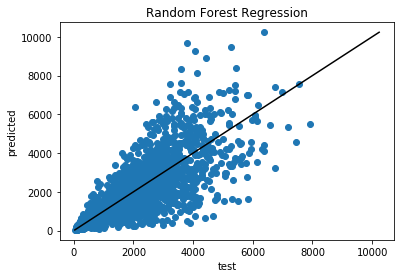

In [56]:
plt.scatter(y_pred_rfr,y_test)
plt.title('Random Forest Regression')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='black')
plt.xlabel('test')
plt.ylabel('predicted')
plt.show()

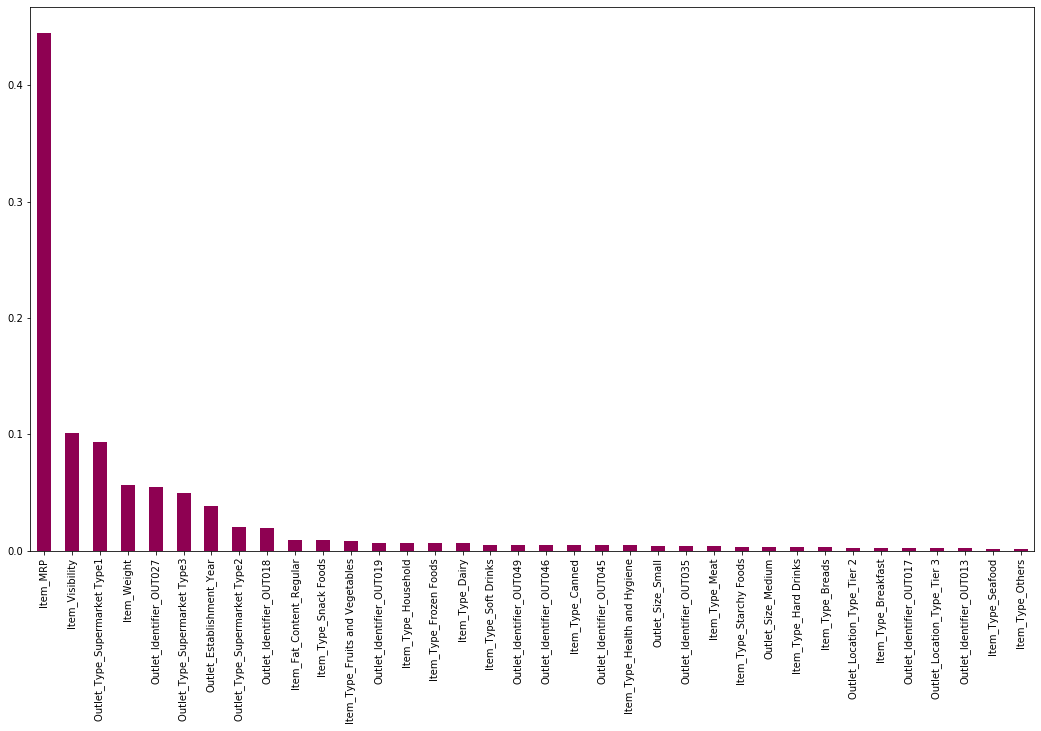

In [57]:
pd.Series(rfr.feature_importances_,index=X.columns).sort_values(ascending=False).plot(kind='bar',figsize=(18,10),cmap='PiYG');

In [58]:
dtr=DecisionTreeRegressor()
dtr.fit(X_train,y_train)
y_dtr_predicted=dtr.predict(X_test)
scores.append(('Decision Tree Regression',r2_score(y_test,y_dtr_predicted)))

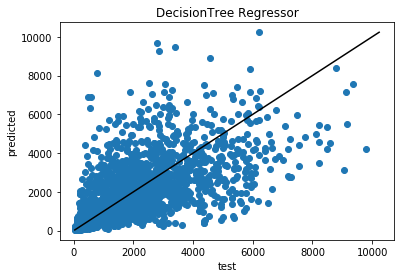

In [59]:
plt.scatter(y_dtr_predicted,y_test)
plt.title('DecisionTree Regressor')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='black')
plt.xlabel('test')
plt.ylabel('predicted')
plt.show()

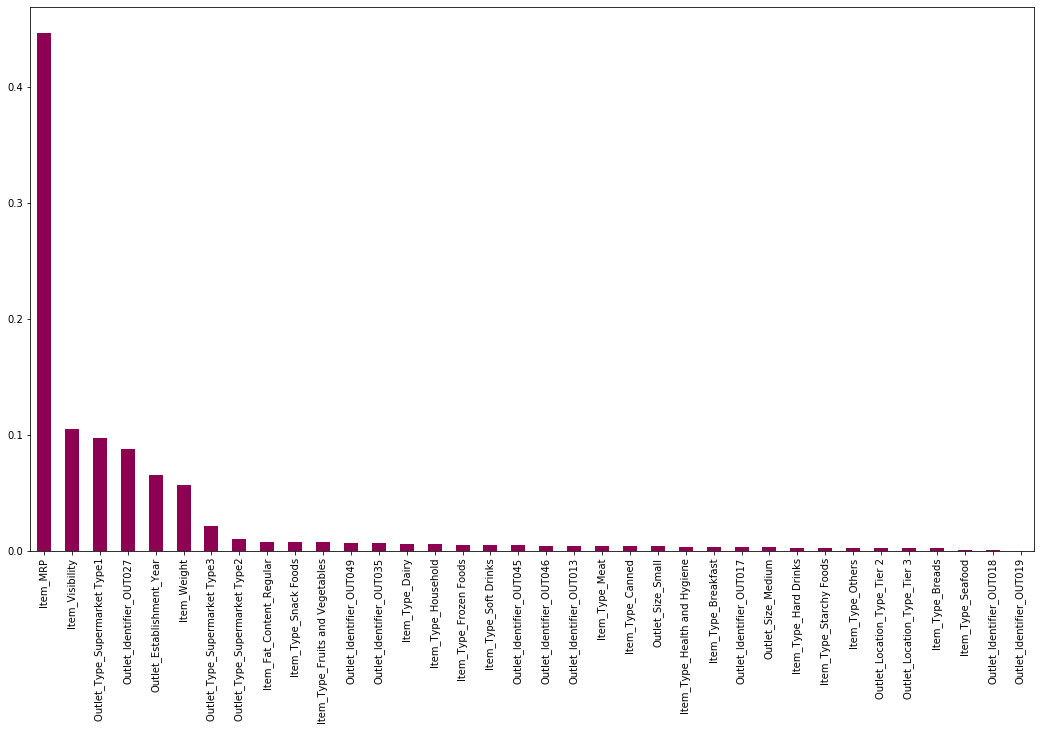

In [60]:
pd.Series(dtr.feature_importances_,index=X.columns).sort_values(ascending=False).plot(kind='bar',figsize=(18,10),cmap='PiYG');

In [61]:
extr=ExtraTreesRegressor()
extr.fit(X_train,y_train)

y_pred_extr=extr.predict(X_test)
scores.append(('ExtraTreesRegressor',r2_score(y_test,y_pred_extr)))


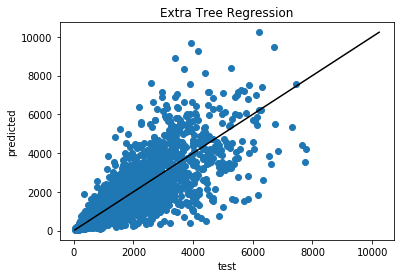

In [62]:
plt.scatter(y_pred_extr,y_test)
plt.title('Extra Tree Regression')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='black')
plt.xlabel('test')
plt.ylabel('predicted')
plt.show()

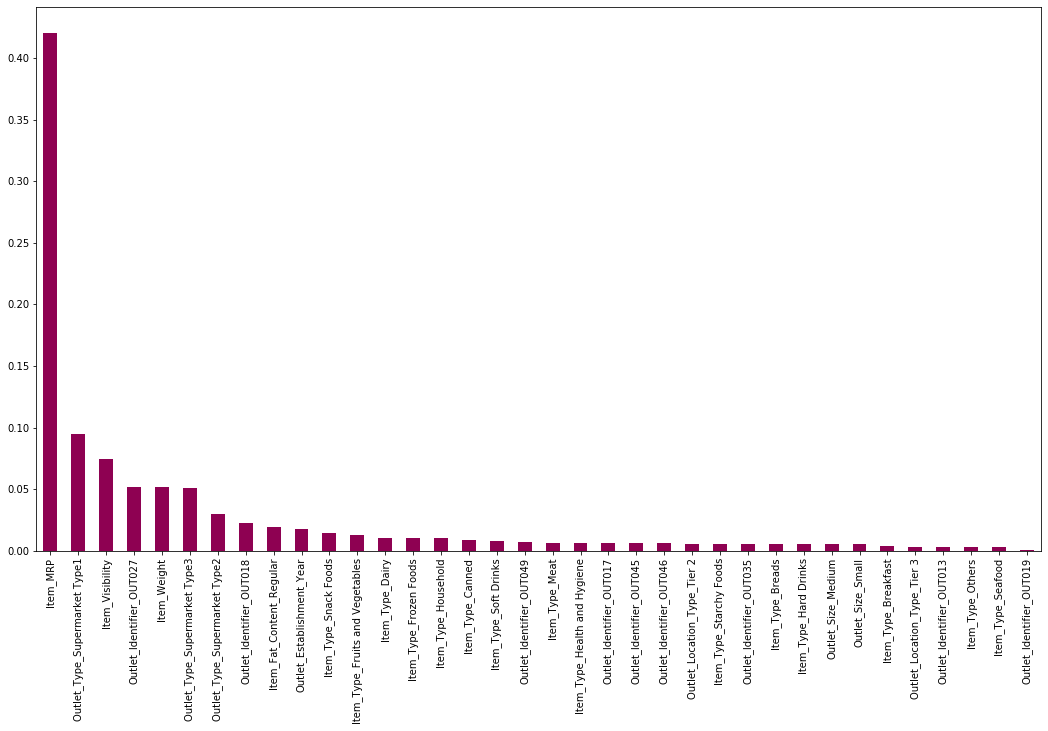

In [63]:
pd.Series(extr.feature_importances_,index=X.columns).sort_values(ascending=False).plot(kind='bar',figsize=(18,10),cmap='PiYG');

## XGBRegression

In [91]:
xgb_r = xg.XGBRegressor()
xgb_r.fit(X_train,y_train)

y_pred_xgb_r=xgb_r.predict(X_test)
scores.append(('XGBoost Regression',r2_score(y_test,y_pred_xgb_r)))


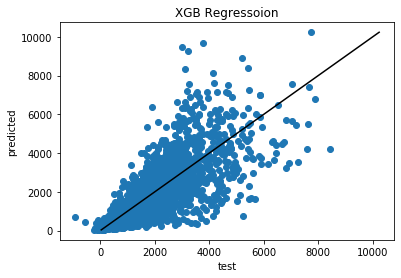

In [92]:
plt.scatter(y_pred_xgb_r,y_test)
plt.title('XGB Regressoion')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='black')
plt.xlabel('test')
plt.ylabel('predicted')
plt.show()

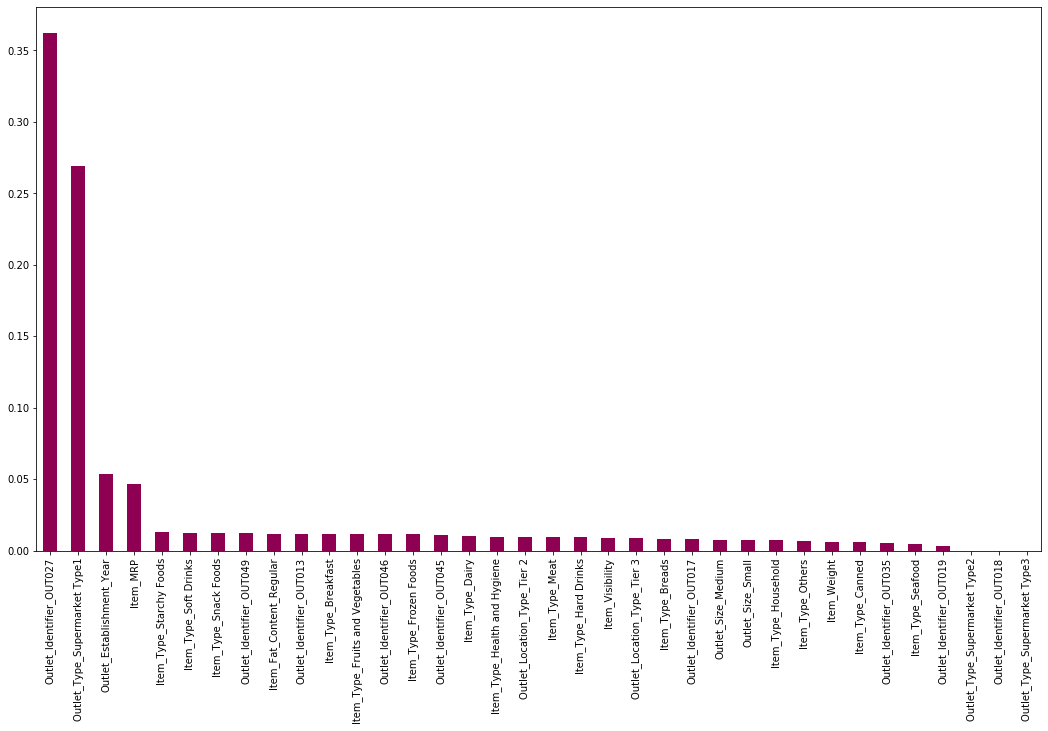

In [93]:
pd.Series(xgb_r.feature_importances_,index=X.columns).sort_values(ascending=False).plot(kind='bar',figsize=(18,10),cmap='PiYG');

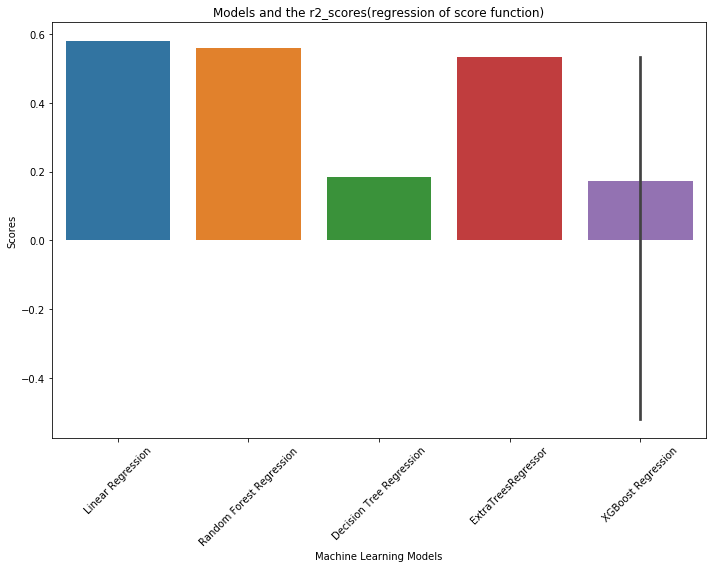

In [94]:
df1= pd.DataFrame(scores,columns =['Machine Learning Models', 'Scores']) 
plt.figure(figsize=(10,8))
sns.barplot(x=df1['Machine Learning Models'],y=df1['Scores'])
plt.xticks(rotation=45)

plt.title('Models and the r2_scores(regression of score function)' )
plt.tight_layout()
plt.show()


In [95]:
max(scores)

('XGBoost Regression', 0.5518640939924908)

### Prediction of testing data

## Preparation of Test dataset

In [96]:
dft=pd.read_csv('Test.csv')
dft.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [97]:
dft.Item_Fat_Content.replace({'low fat':'Low Fat','reg':'Regular','LF':'Low Fat'},inplace=True)

In [98]:
dft.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5681 entries, 0 to 5680
Data columns (total 11 columns):
Item_Identifier              5681 non-null object
Item_Weight                  4705 non-null float64
Item_Fat_Content             5681 non-null object
Item_Visibility              5681 non-null float64
Item_Type                    5681 non-null object
Item_MRP                     5681 non-null float64
Outlet_Identifier            5681 non-null object
Outlet_Establishment_Year    5681 non-null int64
Outlet_Size                  4075 non-null object
Outlet_Location_Type         5681 non-null object
Outlet_Type                  5681 non-null object
dtypes: float64(3), int64(1), object(7)
memory usage: 488.3+ KB


In [99]:
imp2 = SimpleImputer(strategy='most_frequent')
dft['Outlet_Size']=imp2.fit_transform(dft['Outlet_Size'].values.reshape(-1,1))[:,0]

In [73]:
imp3 = SimpleImputer(strategy='mean')
dft.Item_Weight=imp3.fit_transform(dft['Item_Weight'].values.reshape(-1,1))[:,0]

In [74]:
dft.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5681 entries, 0 to 5680
Data columns (total 11 columns):
Item_Identifier              5681 non-null object
Item_Weight                  5681 non-null float64
Item_Fat_Content             5681 non-null object
Item_Visibility              5681 non-null float64
Item_Type                    5681 non-null object
Item_MRP                     5681 non-null float64
Outlet_Identifier            5681 non-null object
Outlet_Establishment_Year    5681 non-null int64
Outlet_Size                  5681 non-null object
Outlet_Location_Type         5681 non-null object
Outlet_Type                  5681 non-null object
dtypes: float64(3), int64(1), object(7)
memory usage: 488.3+ KB


In [75]:
dft=dft.drop(['Item_Identifier'],axis=1)

In [76]:
dft=pd.get_dummies(dft,drop_first=True)
dft.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Fat_Content_Regular,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,Item_Type_Dairy,Item_Type_Frozen Foods,...,Outlet_Identifier_OUT045,Outlet_Identifier_OUT046,Outlet_Identifier_OUT049,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,20.750000,0.007565,107.8622,1999,0,0,0,0,0,0,...,0,0,1,1,0,0,0,1,0,0
1,8.300000,0.038428,87.3198,2007,1,0,0,0,1,0,...,0,0,0,1,0,1,0,1,0,0
2,14.600000,0.099575,241.7538,1998,0,0,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0
3,7.315000,0.015388,155.0340,2007,0,0,0,0,0,0,...,0,0,0,1,0,1,0,1,0,0
4,12.695633,0.118599,234.2300,1985,1,0,0,0,1,0,...,0,0,0,1,0,0,1,0,0,1


In [77]:
X_test_csv=dft

In [78]:
y_pred=xgb_r.predict(X_test_csv)
y_pred


array([160.23132 , 130.97878 ,  56.143776, ..., 176.77983 , 378.0919  ,
       130.97878 ], dtype=float32)